In [31]:
from pathlib import Path
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from data_pipeline.kaggle import download_and_unzip_kaggle
from data_pipeline.data_loader import load_data
from data_pipeline.preprocess import preprocess_data
from forex_python.converter import CurrencyRates

BASE_DIR = Path.cwd()  # Use os to get current working directory 

 # path to database 
df = pd.read_csv('./expense_data_1.csv') # place csv in data frame for EDA

In [ ]:
#Check data in the dataframe


In [ ]:
# Subcategory and note removed due to NaN
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [25]:
#Dropped as redundant
df = df.drop(columns=["Subcategory", "Note.1"])
df.head()

,Date,Account,Category,Note,INR,Income/Expense,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,Brownie,0.003663,Expense,50.0,INR,0.003663
1,3/2/2022 10:11,CUB - online payment,Other,To lended people,0.021977,Expense,300.0,INR,0.021977
2,3/1/2022 19:50,CUB - online payment,Food,Dinner,0.005714,Expense,78.0,INR,0.005714
3,3/1/2022 18:56,CUB - online payment,Transportation,Metro,0.002198,Expense,30.0,INR,0.002198
4,3/1/2022 18:22,CUB - online payment,Food,Snacks,0.004908,Expense,67.0,INR,0.004908


In [26]:
c = CurrencyRates()

inr_to_gbp = c.get_rate('INR', 'GBP')


df['INR'] = df['INR'] * inr_to_gbp
df['Account.1'] = df['Account.1'] * inr_to_gbp

print(df.head())

             Date               Account        Category              Note  \
0  3/2/2022 10:11  CUB - online payment            Food           Brownie   
1  3/2/2022 10:11  CUB - online payment           Other  To lended people   
2  3/1/2022 19:50  CUB - online payment            Food            Dinner   
3  3/1/2022 18:56  CUB - online payment  Transportation             Metro   
4  3/1/2022 18:22  CUB - online payment            Food            Snacks   

        INR Income/Expense  Amount Currency  Account.1  
0  0.000031        Expense    50.0      INR   0.000031  
1  0.000188        Expense   300.0      INR   0.000188  
2  0.000049        Expense    78.0      INR   0.000049  
3  0.000019        Expense    30.0      INR   0.000019  
4  0.000042        Expense    67.0      INR   0.000042  


In [ ]:
# Amount of payments that are over £1


In [32]:
if(df. > 1):
    plt.hist(df['Amount'], df['Account.1'])
    plt.xlabel("Amount")
    plt.ylabel("Account")
    plt.title("Scatter Plot of Amount vs Account")
    plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

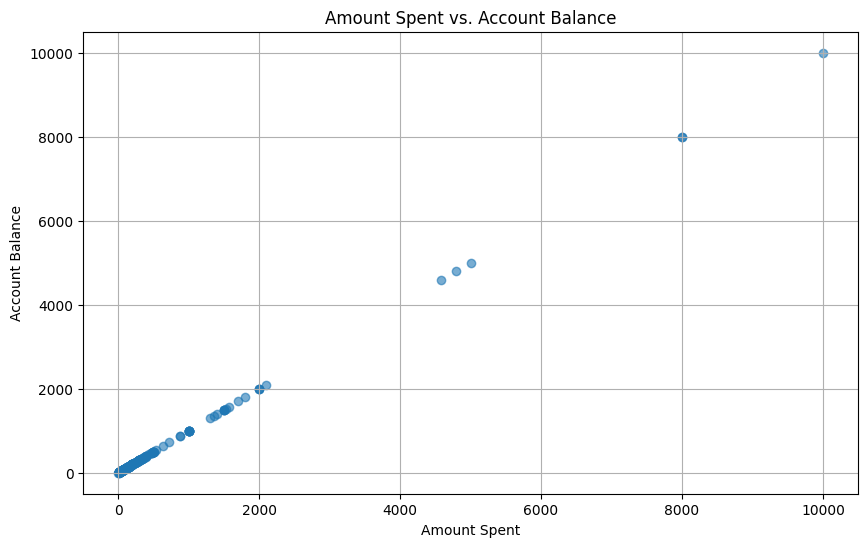

In [33]:
filtered_df = df[df['Amount'] > 1]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Amount'], filtered_df['Account.1'], alpha=0.6)
plt.xlabel("Amount Spent")
plt.ylabel("Account Balance")
plt.title("Amount Spent vs. Account Balance")
plt.grid(True)
plt.show()